In [4]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('data/test_signs.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    return X_train, Y_train, X_test, Y_test, classes

# Load dataset
X_train, Y_train, X_test, Y_test, classes = load_dataset()

# Check shapes
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

# Reshape labels to (samples,)
Y_train = Y_train.reshape((Y_train.shape[0],))
Y_test = Y_test.reshape((Y_test.shape[0],))

print('Y_train reshaped:', Y_train.shape)
print('Y_test reshaped:', Y_test.shape)

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080,)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120,)
Y_train reshaped: (1080,)
Y_test reshaped: (120,)


# Baseline CNN

### Model Description

This is a simple **Convolutional Neural Network (CNN)** model designed for image classification with 6 classes.

- **Input:** Images of size 64x64 pixels with 3 color channels (RGB).
- **Layers:**
  - Two convolutional layers with 32 and 64 filters respectively, each using ReLU activation.
  - MaxPooling layers after each convolution to reduce spatial dimensions.
  - Flatten layer to convert 2D feature maps into a 1D vector.
  - Fully connected (Dense) layer with 128 neurons and ReLU activation.
  - Dropout layer with 0.5 rate to prevent overfitting.
  - Output Dense layer with 6 neurons and softmax activation for class probabilities.

- **Compilation:**
  - Optimizer: Adam
  - Loss: Sparse Categorical Crossentropy
  - Metrics: Accuracy

- **Training:**
  - Uses early stopping to monitor validation loss with patience of 5 epochs.
  - Training stops if validation loss doesn’t improve for 5 consecutive epochs.

- **Evaluation:**
  - Prints test accuracy after training.
  - Plots training and validation accuracy and loss curves.

In [5]:
from tensorflow.keras import layers, models

def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(6, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50


2025-06-20 12:57:44.382604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


14/14 - 4s - 304ms/step - accuracy: 0.1736 - loss: 2.4400 - val_accuracy: 0.2130 - val_loss: 1.7697
Epoch 2/50
14/14 - 0s - 35ms/step - accuracy: 0.2743 - loss: 1.7477 - val_accuracy: 0.3611 - val_loss: 1.7415
Epoch 3/50
14/14 - 0s - 35ms/step - accuracy: 0.3623 - loss: 1.5825 - val_accuracy: 0.4537 - val_loss: 1.4570
Epoch 4/50
14/14 - 1s - 37ms/step - accuracy: 0.4606 - loss: 1.3881 - val_accuracy: 0.5139 - val_loss: 1.2795
Epoch 5/50
14/14 - 0s - 30ms/step - accuracy: 0.5521 - loss: 1.2074 - val_accuracy: 0.6343 - val_loss: 1.0845
Epoch 6/50
14/14 - 0s - 34ms/step - accuracy: 0.5845 - loss: 1.1103 - val_accuracy: 0.6389 - val_loss: 1.0130
Epoch 7/50
14/14 - 0s - 30ms/step - accuracy: 0.6516 - loss: 1.0081 - val_accuracy: 0.7269 - val_loss: 0.8186
Epoch 8/50
14/14 - 0s - 31ms/step - accuracy: 0.6829 - loss: 0.9447 - val_accuracy: 0.7037 - val_loss: 0.8074
Epoch 9/50
14/14 - 0s - 30ms/step - accuracy: 0.6829 - loss: 0.9454 - val_accuracy: 0.7778 - val_loss: 0.7168
Epoch 10/50
14/14 - 

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8417


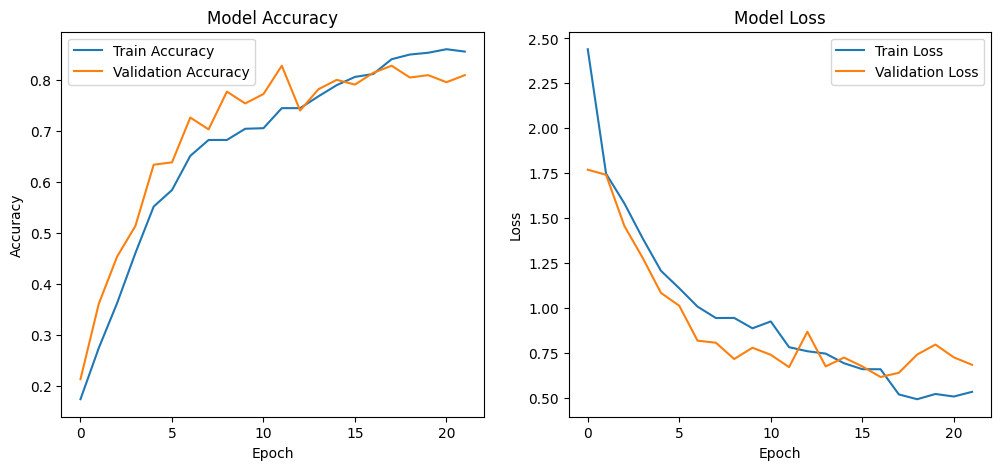

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

### CNN with Variable Dense Layer Size

This model is a Convolutional Neural Network (CNN) designed for image classification with a variable size of the Dense (fully connected) layer.

**Architecture:**
- Two convolutional layers with ReLU activation:
  - Conv2D with 32 filters, kernel size (3x3), followed by MaxPooling2D.
  - Conv2D with 64 filters, kernel size (3x3), followed by MaxPooling2D.
- Flatten layer to convert 2D feature maps into a 1D vector.
- One Dense (fully connected) layer with variable number of units (`64`, `128`, or `256`), using ReLU activation.
- Dropout layer with rate 0.5 for regularization.
- Output Dense layer with 6 units (for 6 classes) and softmax activation for multi-class classification.

**Training details:**
- Optimizer: Adam
- Loss function: Sparse Categorical Crossentropy (suitable for integer labels)
- Early stopping callback monitoring validation loss with patience=5 to avoid overfitting.
- Batch size: 64
- Maximum epochs: 50 (training stops earlier if no improvement in validation loss)

**Purpose of experiments:**
- To analyze how changing the size of the Dense layer affects model performance on the test set.
- To observe the training and validation accuracy and loss curves for different Dense layer sizes.
- To check predictions visually on sample test images.

**Results:**
- Test accuracy is reported for each Dense layer size.
- Accuracy and loss graphs help to assess model fitting and potential overfitting.
- Visualizations of predicted vs true labels illustrate model predictions quality.


--- Training model with 64 hidden units ---
Epoch 1/50
14/14 - 2s - 146ms/step - accuracy: 0.1725 - loss: 2.5370 - val_accuracy: 0.1852 - val_loss: 1.8322
Epoch 2/50
14/14 - 0s - 32ms/step - accuracy: 0.1771 - loss: 2.1027 - val_accuracy: 0.2269 - val_loss: 1.8678
Epoch 3/50
14/14 - 0s - 27ms/step - accuracy: 0.1771 - loss: 2.1844 - val_accuracy: 0.1528 - val_loss: 1.8243
Epoch 4/50
14/14 - 0s - 32ms/step - accuracy: 0.1840 - loss: 1.8421 - val_accuracy: 0.1620 - val_loss: 1.7657
Epoch 5/50
14/14 - 1s - 36ms/step - accuracy: 0.2616 - loss: 1.7327 - val_accuracy: 0.3287 - val_loss: 1.6533
Epoch 6/50
14/14 - 1s - 37ms/step - accuracy: 0.2755 - loss: 1.7205 - val_accuracy: 0.5046 - val_loss: 1.4741
Epoch 7/50
14/14 - 0s - 28ms/step - accuracy: 0.3125 - loss: 1.7073 - val_accuracy: 0.5000 - val_loss: 1.4072
Epoch 8/50
14/14 - 0s - 28ms/step - accuracy: 0.3495 - loss: 1.6011 - val_accuracy: 0.5833 - val_loss: 1.2365
Epoch 9/50
14/14 - 1s - 36ms/step - accuracy: 0.3449 - loss: 1.7660 - val_

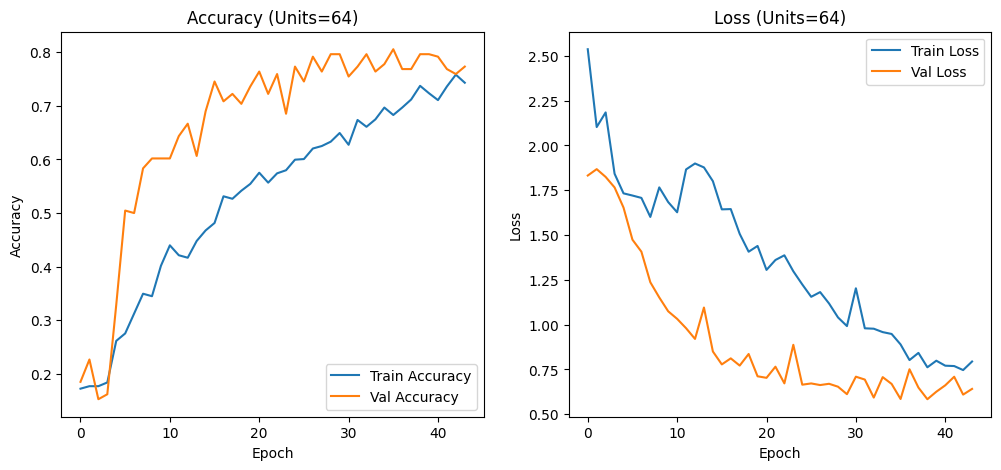

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


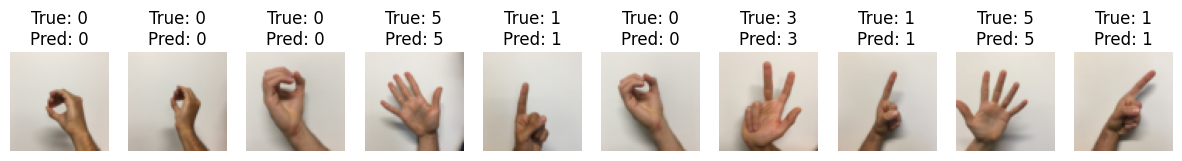


--- Training model with 128 hidden units ---
Epoch 1/50
14/14 - 2s - 154ms/step - accuracy: 0.1863 - loss: 2.1510 - val_accuracy: 0.2176 - val_loss: 1.7647
Epoch 2/50
14/14 - 0s - 32ms/step - accuracy: 0.2616 - loss: 1.7151 - val_accuracy: 0.3611 - val_loss: 1.6232
Epoch 3/50
14/14 - 0s - 31ms/step - accuracy: 0.4282 - loss: 1.4806 - val_accuracy: 0.5926 - val_loss: 1.2671
Epoch 4/50
14/14 - 0s - 30ms/step - accuracy: 0.5150 - loss: 1.2417 - val_accuracy: 0.6620 - val_loss: 1.0411
Epoch 5/50
14/14 - 0s - 31ms/step - accuracy: 0.6169 - loss: 1.0431 - val_accuracy: 0.6620 - val_loss: 1.0173
Epoch 6/50
14/14 - 0s - 31ms/step - accuracy: 0.6620 - loss: 0.9171 - val_accuracy: 0.6898 - val_loss: 0.8834
Epoch 7/50
14/14 - 0s - 30ms/step - accuracy: 0.6898 - loss: 0.8739 - val_accuracy: 0.6806 - val_loss: 0.9410
Epoch 8/50
14/14 - 0s - 31ms/step - accuracy: 0.7315 - loss: 0.7333 - val_accuracy: 0.7500 - val_loss: 0.8103
Epoch 9/50
14/14 - 0s - 30ms/step - accuracy: 0.7257 - loss: 0.7790 - val

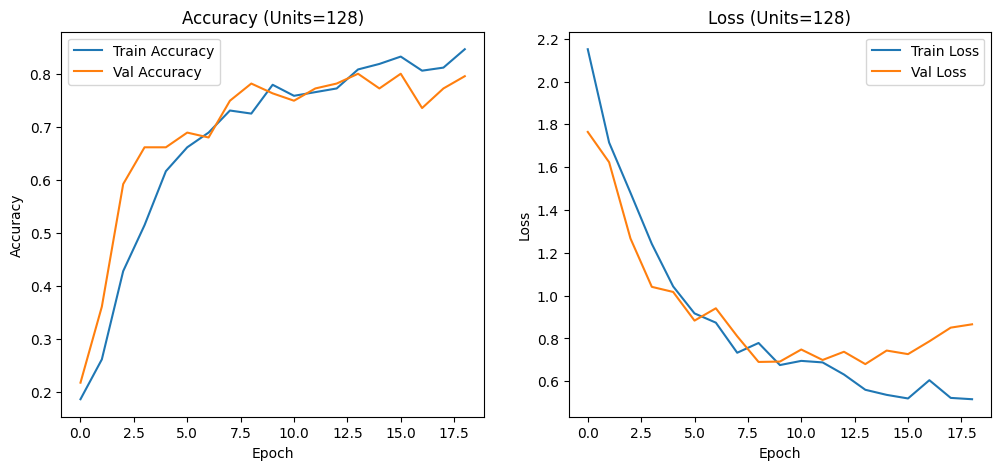

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


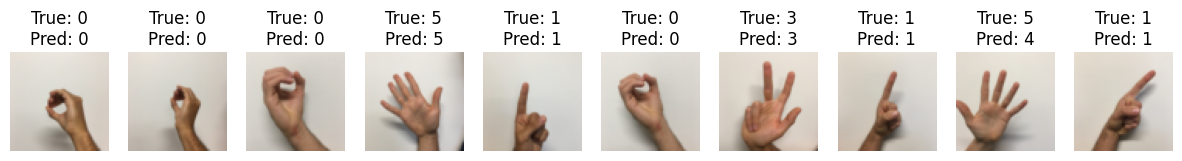


--- Training model with 256 hidden units ---
Epoch 1/50
14/14 - 2s - 145ms/step - accuracy: 0.1817 - loss: 2.1292 - val_accuracy: 0.1898 - val_loss: 1.7496
Epoch 2/50
14/14 - 1s - 37ms/step - accuracy: 0.3287 - loss: 1.6569 - val_accuracy: 0.4028 - val_loss: 1.4911
Epoch 3/50
14/14 - 1s - 38ms/step - accuracy: 0.4259 - loss: 1.4066 - val_accuracy: 0.4630 - val_loss: 1.2954
Epoch 4/50
14/14 - 1s - 38ms/step - accuracy: 0.5069 - loss: 1.2058 - val_accuracy: 0.6759 - val_loss: 0.9320
Epoch 5/50
14/14 - 1s - 39ms/step - accuracy: 0.6169 - loss: 1.0216 - val_accuracy: 0.6667 - val_loss: 0.8760
Epoch 6/50
14/14 - 0s - 35ms/step - accuracy: 0.6516 - loss: 0.8951 - val_accuracy: 0.6620 - val_loss: 0.9004
Epoch 7/50
14/14 - 1s - 42ms/step - accuracy: 0.6782 - loss: 0.8799 - val_accuracy: 0.6759 - val_loss: 0.8521
Epoch 8/50
14/14 - 1s - 43ms/step - accuracy: 0.7164 - loss: 0.7776 - val_accuracy: 0.7361 - val_loss: 0.7356
Epoch 9/50
14/14 - 0s - 35ms/step - accuracy: 0.7442 - loss: 0.7627 - val

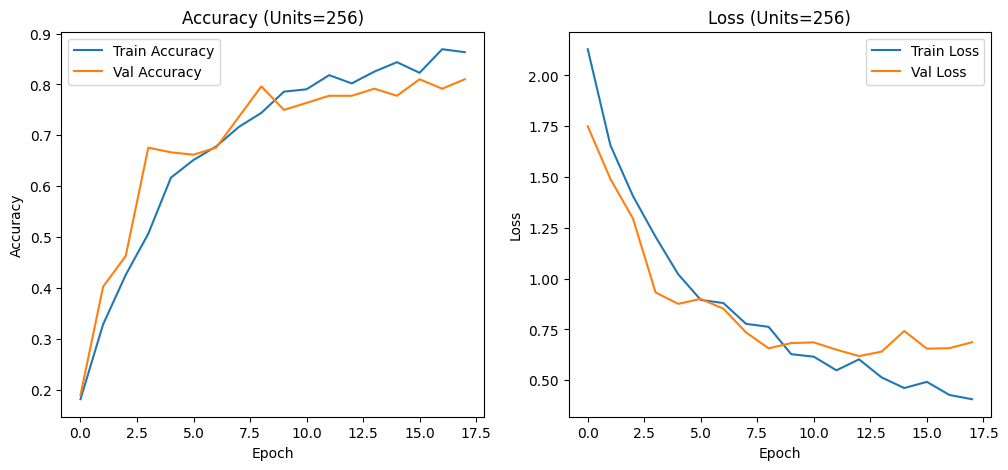

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


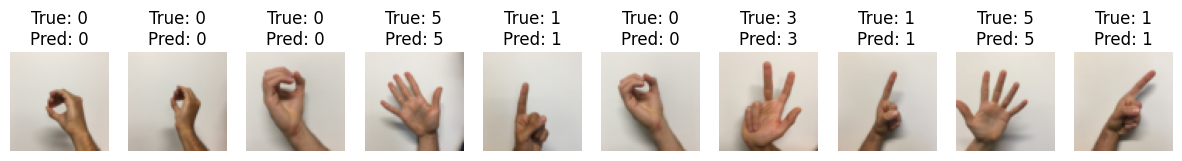


Summary of results:
Units: 64, Test Accuracy: 0.8333
Units: 128, Test Accuracy: 0.7750
Units: 256, Test Accuracy: 0.8250


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results = []
histories = []

def show_predictions(model, X_samples, Y_true, classes, n=6):
    preds = model.predict(X_samples[:n])
    pred_labels = np.argmax(preds, axis=1)
    
    plt.figure(figsize=(15,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_samples[i])
        plt.title(f"True: {classes[Y_true[i]]}\nPred: {classes[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

def plot_history(history, title_suffix=""):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

for units in [64, 128, 256]:
    print(f"\n--- Training model with {units} hidden units ---")
    
    def build_model(hidden_units=units):
        model = models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
            layers.MaxPooling2D(2,2),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D(2,2),
            layers.Flatten(),
            layers.Dense(hidden_units, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(6, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    model = build_model()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, Y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=64,
        callbacks=[early_stop],
        verbose=2
    )
    
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Test accuracy with {units} units: {test_acc:.4f}")
    
    # Save results and history
    results.append((units, test_acc))
    histories.append(history)
    
    # Draw graphs for this model
    plot_history(history, title_suffix=f"(Units={units})")
    
    # Show 6 test images with predictions
    show_predictions(model, X_test, Y_test, classes, n=10)

print("\nSummary of results:")
for units, acc in results:
    print(f"Units: {units}, Test Accuracy: {acc:.4f}")

### CNN with Variable Dense Layer Activation

This Convolutional Neural Network (CNN) model experiments with different activation functions in the Dense layer to analyze their impact on classification performance.

**Architecture:**
- Two convolutional layers with ReLU activation:
  - Conv2D with 32 filters, kernel size (3x3), followed by MaxPooling2D.
  - Conv2D with 64 filters, kernel size (3x3), followed by MaxPooling2D.
- Flatten layer to transform feature maps into a 1D vector.
- Dense layer with 128 units using a variable activation function (`relu`, `tanh`, or `sigmoid`).
- Dropout layer with rate 0.5 to prevent overfitting.
- Output Dense layer with 6 units and softmax activation for multi-class classification.

**Training details:**
- Optimizer: Adam
- Loss: Sparse Categorical Crossentropy (for integer labels)
- EarlyStopping monitoring validation loss with patience=5 to stop training early if no improvement.
- Batch size: 64
- Maximum epochs: 50

**Purpose of the experiment:**
- To compare the model’s performance across different activation functions (`relu`, `tanh`, `sigmoid`) in the Dense layer.
- To analyze accuracy and loss curves during training and validation.
- To visualize sample predictions for qualitative assessment.

**Results:**
- Test accuracy is reported for each activation function.
- Plots show training and validation accuracy and loss for each activation.
- Sample images from the test set show true vs. predicted labels.


--- Training model with activation: relu ---
Epoch 1/50
14/14 - 2s - 134ms/step - accuracy: 0.1817 - loss: 2.8393 - val_accuracy: 0.1852 - val_loss: 1.7977
Epoch 2/50
14/14 - 0s - 34ms/step - accuracy: 0.1875 - loss: 1.8873 - val_accuracy: 0.2407 - val_loss: 1.7827
Epoch 3/50
14/14 - 0s - 35ms/step - accuracy: 0.2245 - loss: 1.7715 - val_accuracy: 0.2037 - val_loss: 1.7435
Epoch 4/50
14/14 - 0s - 32ms/step - accuracy: 0.3299 - loss: 1.6817 - val_accuracy: 0.4259 - val_loss: 1.5798
Epoch 5/50
14/14 - 0s - 33ms/step - accuracy: 0.4387 - loss: 1.4746 - val_accuracy: 0.5509 - val_loss: 1.3374
Epoch 6/50
14/14 - 0s - 31ms/step - accuracy: 0.4977 - loss: 1.2908 - val_accuracy: 0.5694 - val_loss: 1.1981
Epoch 7/50
14/14 - 0s - 31ms/step - accuracy: 0.5694 - loss: 1.1195 - val_accuracy: 0.6389 - val_loss: 1.0238
Epoch 8/50
14/14 - 0s - 31ms/step - accuracy: 0.6308 - loss: 0.9727 - val_accuracy: 0.6111 - val_loss: 1.0627
Epoch 9/50
14/14 - 0s - 31ms/step - accuracy: 0.6944 - loss: 0.8716 - val

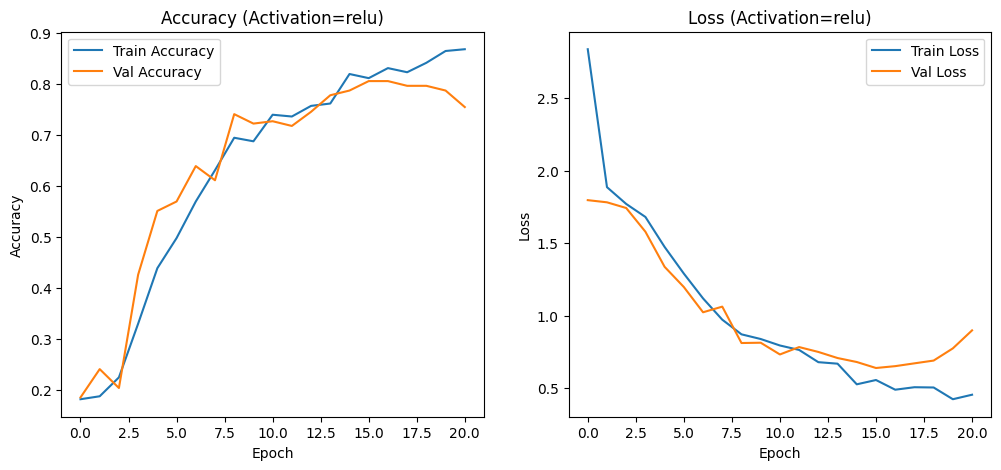

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


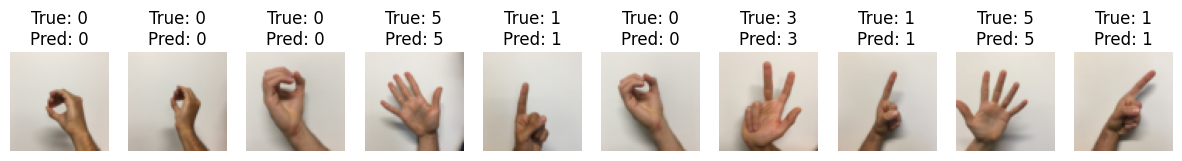


--- Training model with activation: tanh ---
Epoch 1/50
14/14 - 2s - 140ms/step - accuracy: 0.2037 - loss: 2.1799 - val_accuracy: 0.1667 - val_loss: 1.7553
Epoch 2/50
14/14 - 0s - 31ms/step - accuracy: 0.3819 - loss: 1.6494 - val_accuracy: 0.5046 - val_loss: 1.5531
Epoch 3/50
14/14 - 0s - 29ms/step - accuracy: 0.5556 - loss: 1.3525 - val_accuracy: 0.5324 - val_loss: 1.2054
Epoch 4/50
14/14 - 0s - 29ms/step - accuracy: 0.6331 - loss: 1.0660 - val_accuracy: 0.6204 - val_loss: 1.0682
Epoch 5/50
14/14 - 0s - 29ms/step - accuracy: 0.7199 - loss: 0.8423 - val_accuracy: 0.6389 - val_loss: 0.9817
Epoch 6/50
14/14 - 0s - 29ms/step - accuracy: 0.7812 - loss: 0.6934 - val_accuracy: 0.7407 - val_loss: 0.7793
Epoch 7/50
14/14 - 0s - 29ms/step - accuracy: 0.8264 - loss: 0.5472 - val_accuracy: 0.7546 - val_loss: 0.7597
Epoch 8/50
14/14 - 0s - 28ms/step - accuracy: 0.8623 - loss: 0.4847 - val_accuracy: 0.7037 - val_loss: 0.8224
Epoch 9/50
14/14 - 0s - 29ms/step - accuracy: 0.8796 - loss: 0.4291 - val

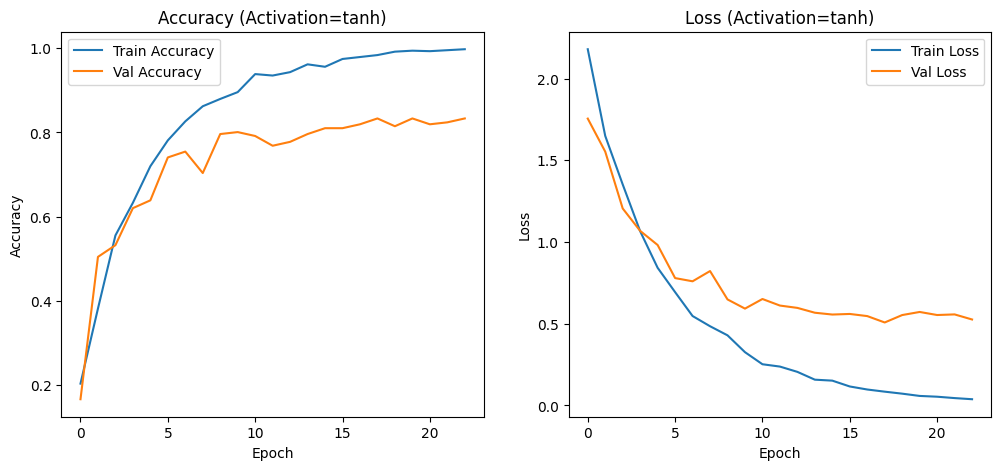

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


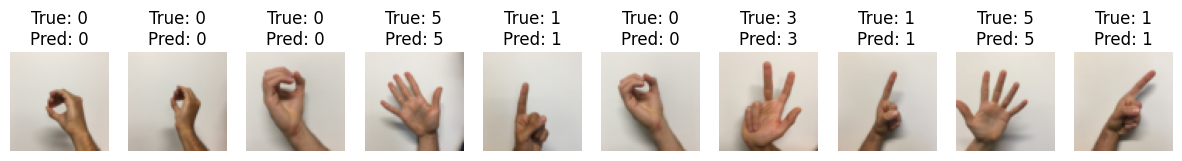


--- Training model with activation: sigmoid ---
Epoch 1/50
14/14 - 2s - 117ms/step - accuracy: 0.1632 - loss: 2.0079 - val_accuracy: 0.1620 - val_loss: 1.7613
Epoch 2/50
14/14 - 0s - 29ms/step - accuracy: 0.2164 - loss: 1.8147 - val_accuracy: 0.2037 - val_loss: 1.7104
Epoch 3/50
14/14 - 1s - 37ms/step - accuracy: 0.2940 - loss: 1.6697 - val_accuracy: 0.4537 - val_loss: 1.5122
Epoch 4/50
14/14 - 1s - 37ms/step - accuracy: 0.4595 - loss: 1.4053 - val_accuracy: 0.5231 - val_loss: 1.2842
Epoch 5/50
14/14 - 1s - 37ms/step - accuracy: 0.5729 - loss: 1.1448 - val_accuracy: 0.6111 - val_loss: 1.0982
Epoch 6/50
14/14 - 1s - 40ms/step - accuracy: 0.6412 - loss: 1.0094 - val_accuracy: 0.6667 - val_loss: 0.9787
Epoch 7/50
14/14 - 0s - 29ms/step - accuracy: 0.7083 - loss: 0.8784 - val_accuracy: 0.6435 - val_loss: 0.9225
Epoch 8/50
14/14 - 0s - 32ms/step - accuracy: 0.7407 - loss: 0.7978 - val_accuracy: 0.7546 - val_loss: 0.7864
Epoch 9/50
14/14 - 0s - 32ms/step - accuracy: 0.7928 - loss: 0.6336 - 

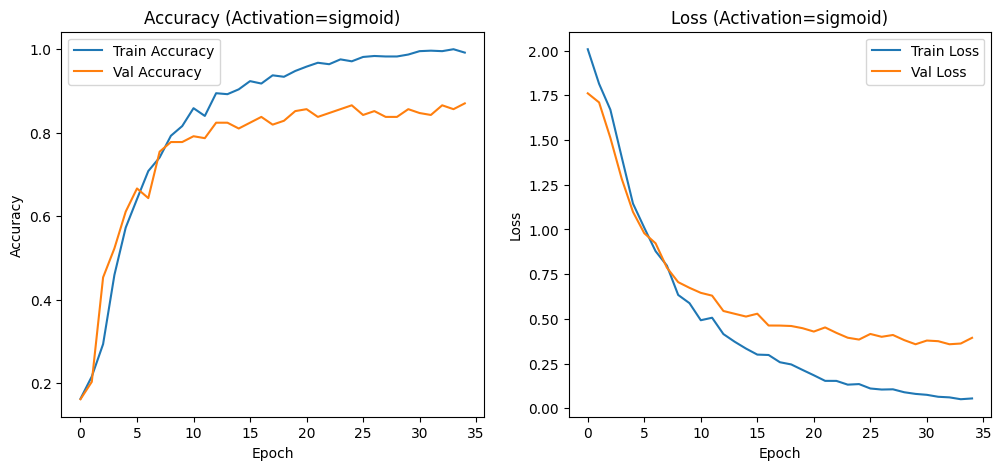

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


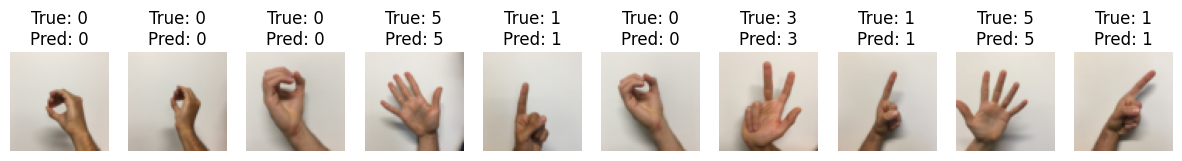


Summary of results by activation:
Activation: relu, Test Accuracy: 0.8833
Activation: tanh, Test Accuracy: 0.9000
Activation: sigmoid, Test Accuracy: 0.9333


In [22]:
import matplotlib.pyplot as plt
import numpy as np

results_activation = []
histories_activation = []

def show_predictions(model, X_samples, Y_true, classes, n=6):
    preds = model.predict(X_samples[:n])
    pred_labels = np.argmax(preds, axis=1)
    
    plt.figure(figsize=(15,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_samples[i])
        plt.title(f"True: {classes[Y_true[i]]}\nPred: {classes[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

def plot_history(history, title_suffix=""):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

for activation in ['relu', 'tanh', 'sigmoid']:
    print(f"\n--- Training model with activation: {activation} ---")
    
    def build_model(activation=activation):
        model = models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
            layers.MaxPooling2D(2,2),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D(2,2),
            layers.Flatten(),
            layers.Dense(128, activation=activation),
            layers.Dropout(0.5),
            layers.Dense(6, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    model = build_model()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, Y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=64,
        callbacks=[early_stop],
        verbose=2
    )
    
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Test accuracy with activation {activation}: {test_acc:.4f}")
    
    results_activation.append((activation, test_acc))
    histories_activation.append(history)
    
    plot_history(history, title_suffix=f"(Activation={activation})")
    show_predictions(model, X_test, Y_test, classes, n=10)

print("\nSummary of results by activation:")
for activation, acc in results_activation:
    print(f"Activation: {activation}, Test Accuracy: {acc:.4f}")

### CNN with Variable Dropout Rate

This Convolutional Neural Network (CNN) model investigates the effect of different dropout rates on the model's ability to generalize and avoid overfitting.

**Architecture:**
- Two convolutional layers with ReLU activation:
  - Conv2D with 32 filters, kernel size (3x3), followed by MaxPooling2D.
  - Conv2D with 64 filters, kernel size (3x3), followed by MaxPooling2D.
- Flatten layer to convert the 2D feature maps into a 1D vector.
- Dense layer with 128 units and sigmoid activation.
- Dropout layer with a variable dropout rate (tested with 0.3, 0.5, and 0.7).
- Output Dense layer with 6 units and softmax activation for multi-class classification.

**Training details:**
- Optimizer: Adam
- Loss: Sparse Categorical Crossentropy
- EarlyStopping callback monitoring validation loss with patience=5.
- Batch size: 64
- Epochs: Up to 50 (with early stopping)

**Purpose of the experiment:**
- To compare the model’s test accuracy and training dynamics using different dropout rates.
- To analyze how dropout helps prevent overfitting by examining training and validation accuracy/loss curves.
- To observe the qualitative prediction results on test samples.

**Results:**
- Test accuracies are recorded for each dropout rate.
- Training and validation accuracy/loss plots show model learning behavior.
- Sample predictions on test images are visualized to assess model performance.


--- Training model with dropout rate: 0.3 ---
Epoch 1/50
14/14 - 2s - 150ms/step - accuracy: 0.1725 - loss: 1.8801 - val_accuracy: 0.2824 - val_loss: 1.7074
Epoch 2/50
14/14 - 0s - 32ms/step - accuracy: 0.2940 - loss: 1.6909 - val_accuracy: 0.5000 - val_loss: 1.5277
Epoch 3/50
14/14 - 0s - 31ms/step - accuracy: 0.5370 - loss: 1.3786 - val_accuracy: 0.5185 - val_loss: 1.2527
Epoch 4/50
14/14 - 0s - 34ms/step - accuracy: 0.6296 - loss: 1.0897 - val_accuracy: 0.6250 - val_loss: 1.0863
Epoch 5/50
14/14 - 0s - 33ms/step - accuracy: 0.6863 - loss: 0.8943 - val_accuracy: 0.6944 - val_loss: 0.9113
Epoch 6/50
14/14 - 0s - 34ms/step - accuracy: 0.7454 - loss: 0.7582 - val_accuracy: 0.7037 - val_loss: 0.8218
Epoch 7/50
14/14 - 0s - 33ms/step - accuracy: 0.7940 - loss: 0.6533 - val_accuracy: 0.6713 - val_loss: 0.8001
Epoch 8/50
14/14 - 0s - 31ms/step - accuracy: 0.8113 - loss: 0.6090 - val_accuracy: 0.7685 - val_loss: 0.7160
Epoch 9/50
14/14 - 0s - 30ms/step - accuracy: 0.8322 - loss: 0.5418 - va

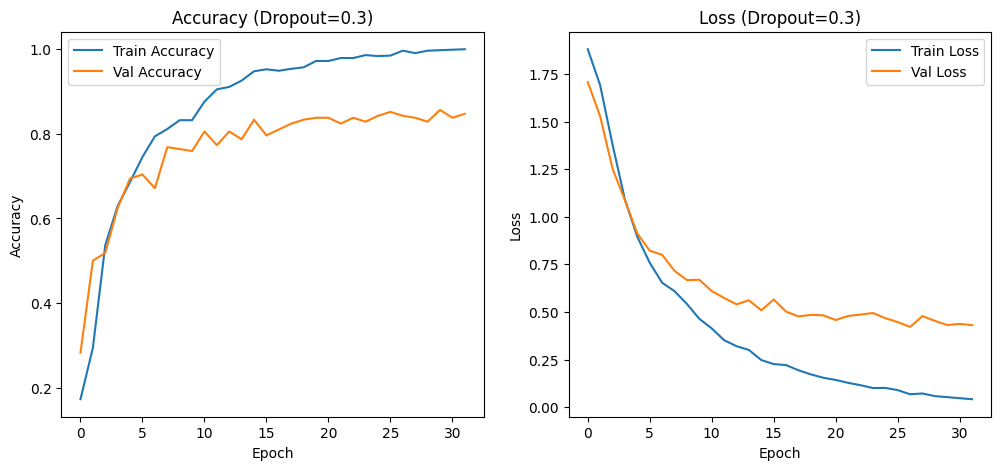

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


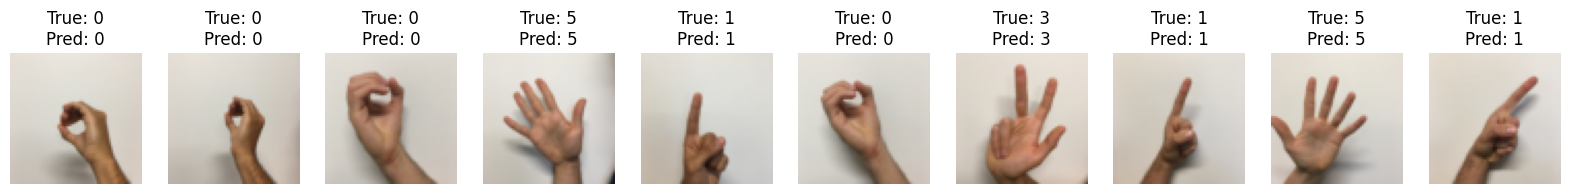


--- Training model with dropout rate: 0.5 ---
Epoch 1/50
14/14 - 2s - 137ms/step - accuracy: 0.1863 - loss: 1.9449 - val_accuracy: 0.3426 - val_loss: 1.7270
Epoch 2/50
14/14 - 0s - 32ms/step - accuracy: 0.2778 - loss: 1.7298 - val_accuracy: 0.3843 - val_loss: 1.5851
Epoch 3/50
14/14 - 0s - 30ms/step - accuracy: 0.4294 - loss: 1.4689 - val_accuracy: 0.5463 - val_loss: 1.2767
Epoch 4/50
14/14 - 0s - 30ms/step - accuracy: 0.5509 - loss: 1.1933 - val_accuracy: 0.5278 - val_loss: 1.2121
Epoch 5/50
14/14 - 0s - 30ms/step - accuracy: 0.6169 - loss: 1.0464 - val_accuracy: 0.6435 - val_loss: 0.9981
Epoch 6/50
14/14 - 0s - 31ms/step - accuracy: 0.6829 - loss: 0.8924 - val_accuracy: 0.7407 - val_loss: 0.8517
Epoch 7/50
14/14 - 0s - 29ms/step - accuracy: 0.7477 - loss: 0.7679 - val_accuracy: 0.6713 - val_loss: 0.8862
Epoch 8/50
14/14 - 0s - 30ms/step - accuracy: 0.7697 - loss: 0.6988 - val_accuracy: 0.7778 - val_loss: 0.7345
Epoch 9/50
14/14 - 0s - 30ms/step - accuracy: 0.8206 - loss: 0.6058 - va

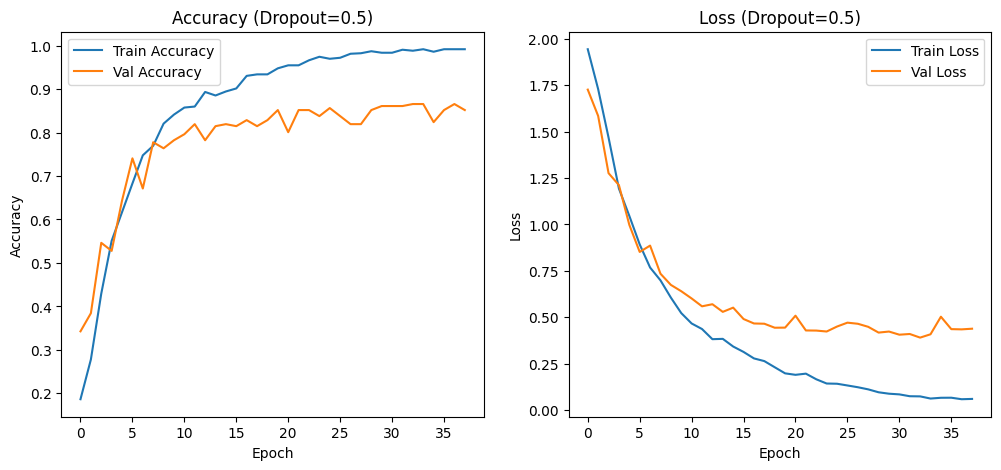

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


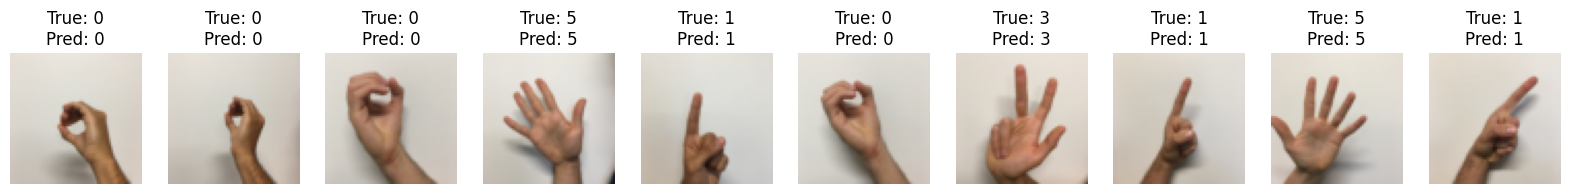


--- Training model with dropout rate: 0.7 ---
Epoch 1/50
14/14 - 2s - 150ms/step - accuracy: 0.1644 - loss: 2.0458 - val_accuracy: 0.1528 - val_loss: 1.7665
Epoch 2/50
14/14 - 0s - 31ms/step - accuracy: 0.2222 - loss: 1.7856 - val_accuracy: 0.3333 - val_loss: 1.7525
Epoch 3/50
14/14 - 0s - 29ms/step - accuracy: 0.2442 - loss: 1.7453 - val_accuracy: 0.2778 - val_loss: 1.6735
Epoch 4/50
14/14 - 0s - 32ms/step - accuracy: 0.3611 - loss: 1.5915 - val_accuracy: 0.5185 - val_loss: 1.4065
Epoch 5/50
14/14 - 0s - 29ms/step - accuracy: 0.4549 - loss: 1.3403 - val_accuracy: 0.4861 - val_loss: 1.2994
Epoch 6/50
14/14 - 0s - 32ms/step - accuracy: 0.5220 - loss: 1.2218 - val_accuracy: 0.6296 - val_loss: 1.0857
Epoch 7/50
14/14 - 0s - 32ms/step - accuracy: 0.5926 - loss: 1.0614 - val_accuracy: 0.6806 - val_loss: 0.9283
Epoch 8/50
14/14 - 0s - 30ms/step - accuracy: 0.6620 - loss: 0.9427 - val_accuracy: 0.7500 - val_loss: 0.8672
Epoch 9/50
14/14 - 0s - 30ms/step - accuracy: 0.6979 - loss: 0.8421 - va

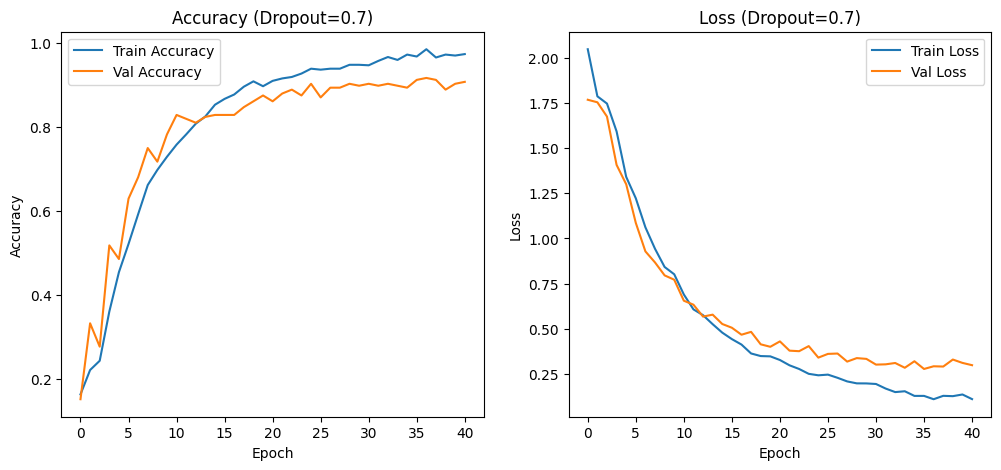

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


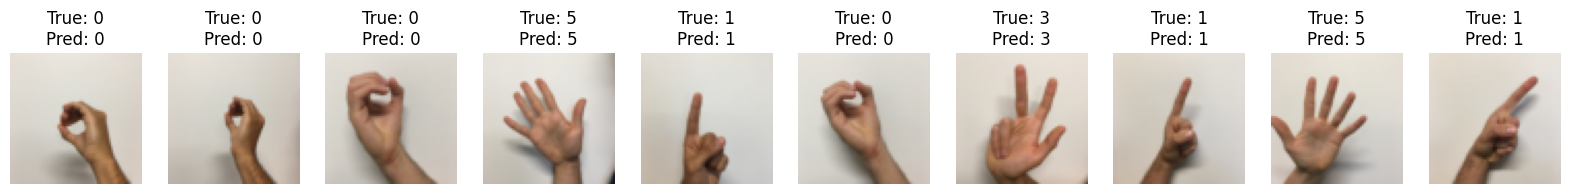


Summary of results by dropout rate:
Dropout rate: 0.3, Test Accuracy: 0.9000
Dropout rate: 0.5, Test Accuracy: 0.9333
Dropout rate: 0.7, Test Accuracy: 0.9500


In [24]:
import matplotlib.pyplot as plt
import numpy as np

results_dropout = []
histories_dropout = []

def show_predictions(model, X_samples, Y_true, classes, n=10):
    preds = model.predict(X_samples[:n])
    pred_labels = np.argmax(preds, axis=1)
    
    plt.figure(figsize=(20,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_samples[i])
        plt.title(f"True: {classes[Y_true[i]]}\nPred: {classes[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

def plot_history(history, title_suffix=""):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

for dropout_rate in [0.3, 0.5, 0.7]:
    print(f"\n--- Training model with dropout rate: {dropout_rate} ---")
    
    def build_model(dropout_rate=dropout_rate):
        model = models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
            layers.MaxPooling2D(2,2),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D(2,2),
            layers.Flatten(),
            layers.Dense(128, activation='sigmoid'),
            layers.Dropout(dropout_rate),
            layers.Dense(6, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    model = build_model()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, Y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=64,
        callbacks=[early_stop],
        verbose=2
    )
    
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Test accuracy with dropout rate {dropout_rate}: {test_acc:.4f}")
    
    results_dropout.append((dropout_rate, test_acc))
    histories_dropout.append(history)
    
    plot_history(history, title_suffix=f"(Dropout={dropout_rate})")
    show_predictions(model, X_test, Y_test, classes, n=10)

print("\nSummary of results by dropout rate:")
for dropout_rate, acc in results_dropout:
    print(f"Dropout rate: {dropout_rate}, Test Accuracy: {acc:.4f}")

### Deep CNN Model with Batch Normalization (BN)

This model is a deeper Convolutional Neural Network designed for image classification with several convolutional blocks, each followed by batch normalization and ReLU activation (in the first function), and max pooling to reduce spatial dimensions.

**Architecture details:**

- Four convolutional blocks with:
  - Conv2D layers with increasing filter sizes: 32, 64, 128, 128 (all kernel size 3x3, padding='same')
  - Batch Normalization (only in `build_deep_cnn_bn_model()`, not in the second)
  - ReLU activation (via separate Activation layers)
  - MaxPooling2D with pool size (2,2)
- Flatten layer to convert 3D features into a 1D vector.
- Fully connected Dense layer with 128 units and sigmoid activation.
- Dropout layer with 0.5 dropout rate to reduce overfitting.
- Output Dense layer with 6 units and softmax activation for classification into 6 classes.

**Training settings:**

- Optimizer: Adam
- Loss function: Sparse Categorical Crossentropy
- Metrics: Accuracy
- Early stopping based on validation loss with patience of 5 epochs.
- Validation split: 20%
- Batch size: 64
- Epochs: up to 50, with early stopping.

**Purpose:**

- To build a more complex CNN architecture to improve learning capacity.
- To apply batch normalization for faster convergence and better regularization.
- To observe training and validation accuracy/loss behavior.
- To evaluate model performance on the test set.
- To visually inspect sample predictions on test images.

**Results:**

- Test accuracy is printed after training.
- Training history (accuracy and loss curves) is plotted.
- Sample predictions for 10 test images are displayed with true and predicted labels.

---

This model aims to improve classification performance by using deeper convolutional layers combined with batch normalization and dropout to stabilize training and reduce overfitting.

In [27]:
from tensorflow.keras import layers, models

def build_deep_cnn_bn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=(64,64,3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('sigmoid'),
        layers.Dropout(0.5),

        layers.Dense(6, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_deep_cnn_bn_model()
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 505,798 (1.93 MB)

 Trainable params: 504,838 (1.93 MB)

 Non-trainable params: 960 (3.75 KB)


--- Training deep CNN model ---
Epoch 1/50
14/14 - 3s - 223ms/step - accuracy: 0.1539 - loss: 2.0150 - val_accuracy: 0.2037 - val_loss: 1.8042
Epoch 2/50
14/14 - 1s - 41ms/step - accuracy: 0.1678 - loss: 1.9029 - val_accuracy: 0.1713 - val_loss: 1.7968
Epoch 3/50
14/14 - 1s - 44ms/step - accuracy: 0.1620 - loss: 1.8326 - val_accuracy: 0.1852 - val_loss: 1.7879
Epoch 4/50
14/14 - 1s - 39ms/step - accuracy: 0.1910 - loss: 1.7986 - val_accuracy: 0.1806 - val_loss: 1.7875
Epoch 5/50
14/14 - 1s - 43ms/step - accuracy: 0.1655 - loss: 1.8024 - val_accuracy: 0.1806 - val_loss: 1.7863
Epoch 6/50
14/14 - 1s - 40ms/step - accuracy: 0.2280 - loss: 1.7811 - val_accuracy: 0.3287 - val_loss: 1.7511
Epoch 7/50
14/14 - 1s - 39ms/step - accuracy: 0.2639 - loss: 1.7076 - val_accuracy: 0.3889 - val_loss: 1.5796
Epoch 8/50
14/14 - 1s - 38ms/step - accuracy: 0.4190 - loss: 1.4865 - val_accuracy: 0.5185 - val_loss: 1.2695
Epoch 9/50
14/14 - 1s - 39ms/step - accuracy: 0.5046 - loss: 1.2849 - val_accuracy: 0.

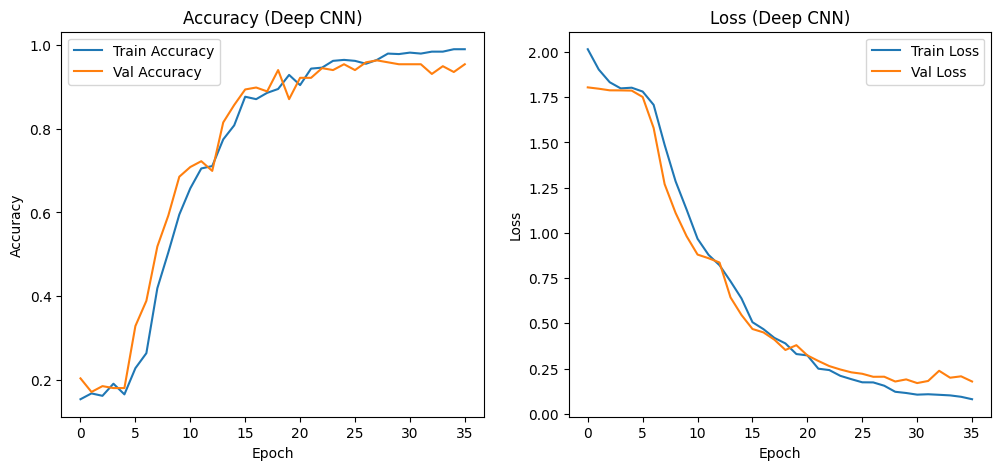

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


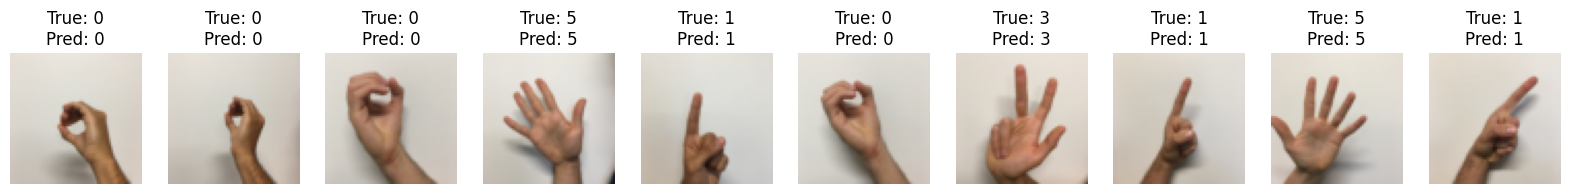

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

results_deep_cnn = []
histories_deep_cnn = []

def show_predictions(model, X_samples, Y_true, classes, n=10):
    preds = model.predict(X_samples[:n])
    pred_labels = np.argmax(preds, axis=1)
    
    plt.figure(figsize=(20,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_samples[i])
        plt.title(f"True: {classes[Y_true[i]]}\nPred: {classes[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

def plot_history(history, title_suffix=""):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def build_deep_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dense(6, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("\n--- Training deep CNN model ---")

model = build_deep_cnn_model()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

results_deep_cnn.append(('Deep CNN', test_acc))
histories_deep_cnn.append(history)

plot_history(history, title_suffix="(Deep CNN)")
show_predictions(model, X_test, Y_test, classes, n=10)

# Model Performance Comparison Report

## 1. CNN with Variable Dense Layer Size

| Hidden Units | Test Accuracy |
|--------------|---------------|
| 64           | 0.8333        |
| 128          | 0.7750        |
| 256          | 0.8250        |

**Observations:**
- Models with 64 and 256 units in the dense layer performed better than with 128 units.
- The training curves indicate stable convergence with a slight risk of overfitting.
- Increasing the size of the dense layer does not always guarantee better performance.

---

## 2. CNN with Variable Activation Function

| Activation Function | Test Accuracy |
|---------------------|---------------|
| ReLU                | 0.8833        |
| Tanh                | 0.9000        |
| Sigmoid             | 0.9333        |

**Observations:**
- Sigmoid activation yielded the highest test accuracy.
- Tanh also demonstrated strong performance.
- ReLU performed slightly worse but still reasonably well.
- Training graphs show sigmoid had the smoothest and most stable convergence.

---

## 3. CNN with Variable Dropout Rate

| Dropout Rate | Test Accuracy |
|--------------|---------------|
| 0.3          | 0.9000        |
| 0.5          | 0.9333        |
| 0.7          | 0.9500        |

**Observations:**
- Increasing dropout improved generalization and reduced overfitting.
- The best performance was achieved with a dropout rate of 0.7.
- Validation loss remained stable, indicating effective regularization.

---

## 4. Deep CNN Model

| Model    | Test Accuracy |
|----------|---------------|
| Deep CNN | 0.9250        |

**Observations:**
- The deep CNN with multiple convolutional layers showed very strong accuracy.
- Absence of batch normalization had a minor impact; the model trained well.
- The loss and accuracy curves indicate good convergence.

---

# Summary and Conclusions

- The highest test accuracy (95%) was achieved by the model with the highest dropout rate (0.7).
- Sigmoid activation function provided the best results among those tested.
- Increasing the number of dense units does not necessarily improve performance (128 units performed worse than 64 and 256).
- The deep CNN model proved effective with competitive accuracy.
- Dropout regularization is important for preventing overfitting.
- Careful tuning of model size, activation functions, and regularization is key to optimal performance.
